In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
dataset = pd.read_csv('data\winequality-red.csv')

print(dataset,dataset.shape)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [5]:
print(dataset.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
dataset = dataset.dropna()

In [7]:
dataset['target'] = (dataset['quality'] >=6).astype(int)

In [8]:
X = dataset.drop(['quality', 'target'], axis=1)
y = dataset['target']


Histogram

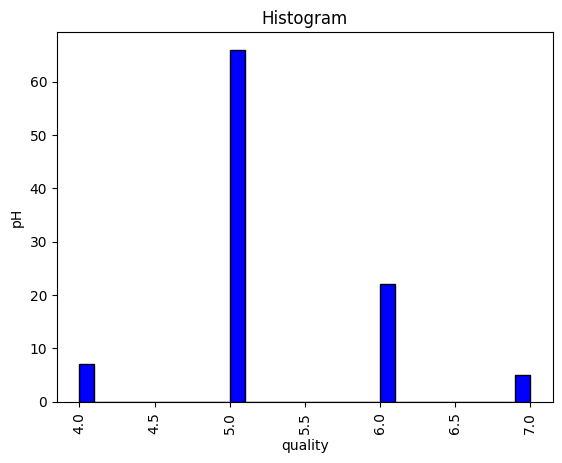

In [9]:
plt.hist(dataset['quality'].head(100), bins=30,
color='blue', edgecolor='black')
plt.title('Histogram')
plt.xticks(rotation=90)
plt.xlabel('quality')
plt.ylabel('pH')
plt.show()

In [10]:
data=dataset.iloc[:,0:11]
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [11]:
target=dataset['target']
print(target)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: target, Length: 1599, dtype: int32


In [12]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

print(test_data,test_data.shape)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
417             7.0              0.58         0.12             1.9      0.091   
1055            8.2              0.64         0.27             2.0      0.095   
291            11.0              0.20         0.48             2.0      0.343   
842            10.6              0.50         0.45             2.6      0.119   
1058            9.9              0.53         0.57             2.4      0.093   
...             ...               ...          ...             ...        ...   
996             5.6              0.66         0.00             2.2      0.087   
226             8.9              0.59         0.50             2.0      0.337   
161             7.6              0.68         0.02             1.3      0.072   
1593            6.8              0.62         0.08             1.9      0.068   
837             6.7              0.28         0.28             2.4      0.012   

      free sulfur dioxide  

In [13]:

print(test_target,test_target.shape)

417     0
1055    1
291     0
842     1
1058    1
       ..
996     1
226     1
161     0
1593    1
837     1
Name: target, Length: 320, dtype: int32 (320,)


In [14]:
from sklearn.svm import SVC
model=SVC(kernel='linear',degree=2)


In [15]:
model.fit(train_data,train_target)

SVC(degree=2, kernel='linear')

In [16]:
predicted_target=model.predict(test_data)

print('Predicted Target: ',predicted_target)



Predicted Target:  [0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1
 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1
 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1]


In [17]:
print('test target :',test_target)

test target : 417     0
1055    1
291     0
842     1
1058    1
       ..
996     1
226     1
161     0
1593    1
837     1
Name: target, Length: 320, dtype: int32


In [18]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(test_target,predicted_target)
print('accuracy_score: ',acc)

accuracy_score:  0.74375


RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(random_state=42)

In [20]:
model_2.fit(train_data,train_target)

RandomForestClassifier(random_state=42)

In [21]:
predicted_target=model_2.predict(test_data)

print('Predicted Target: ',predicted_target)

Predicted Target:  [0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1
 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0
 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1
 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1
 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1
 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0
 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1]


In [22]:
print('test target :',test_target)

test target : 417     0
1055    1
291     0
842     1
1058    1
       ..
996     1
226     1
161     0
1593    1
837     1
Name: target, Length: 320, dtype: int32


In [23]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(test_target,predicted_target)
print('accuracy_score: ',acc)

accuracy_score:  0.8125


In [24]:
import pickle

In [25]:
with open('model_pickle_2','wb') as f:
    pickle.dump(model_2,f)

In [26]:
with open('model_pickle_2','rb') as f:
     model_2 = pickle.load(f)

In [27]:
sample_data = np.array([[7.3, 0.65, 0.0, 1.2, 0.065,
                         15.0, 21.0, 0.9946, 3.39,
                         0.47, 10]])

In [28]:
predicted_quality = model_2.predict(sample_data)

print("Predicted Wine Quality:", predicted_quality[0])

Predicted Wine Quality: 1


c:\Users\Yasiru\anaconda3\envs\ML-Streamlit\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
import sklearn
print(sklearn.__version__)


1.3.2


In [30]:
import sklearn
print(sklearn.__version__)



1.3.2
